In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1. Load the dataset
df = pd.read_csv('master_file.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_2152\2067843543.py:10: DtypeWarning: Columns (17,18,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('master_file.csv')


In [3]:
df.shape

(75731, 74)

In [4]:
# --- Custom Cleaning Step: Age Calculation ---
# Convert date_of_birth to datetime objects
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], format='%d-%m-%Y', errors='coerce')

# Function to calculate age
def calculate_age(born):
    if pd.isnull(born):
        return np.nan
    today = datetime.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

# Apply age calculation
df['age'] = df['date_of_birth'].apply(calculate_age)

In [5]:
# Drop the original date_of_birth column and other non-predictive/empty columns
cols_to_drop = [
    'date_of_birth', 'player_image_url', 'social_media_url', 'date_of_death',
    'player_slug', 'joined', 'contract_expires', 'player_agent_name', 
    'clean_player_name', 'name_in_home_country', 'place_of_birth'
]
# Drop columns that are completely empty
cols_to_drop.extend(df.columns[df.isnull().all()].tolist())
df_clean = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

In [6]:

# --- Define Feature Groups ---
# Identify Numerical and Categorical columns automatically or manually
# For this example, we select a subset of relevant features for the model
numeric_features = ['age', 'height', 'value_x', 'goals_x', 'assists', 'minutes_played', 'days_missed']
categorical_features = ['position', 'foot', 'citizenship', 'injury_reason']

# Filter dataset to just these columns for the pipeline demo (plus target if exists, but we are just preprocessing features here)
df_model = df_clean[numeric_features + categorical_features].copy()


In [7]:
# --- Build the Preprocessing Pipeline ---

# 1. Numeric Transformer: Impute missing values with 'median' and Scale data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [8]:
# 2. Categorical Transformer: Impute missing with 'missing' and OneHotEncode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # sparse_output=False for readable DF
])


In [9]:
# 3. Combine into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    verbose_feature_names_out=False # Keeps simpler column names
)

In [10]:

# --- Apply the Pipeline ---
# Fit and transform the data
X_processed = preprocessor.fit_transform(df_model)

# --- Convert back to DataFrame for saving ---
# Get feature names from the one-hot encoder
feature_names = preprocessor.get_feature_names_out()
df_processed = pd.DataFrame(X_processed, columns=feature_names)


In [ ]:
# Save the processed dataset
output_filename = 'cleaned_preprocessed_master_file.csv'
df_processed.to_csv(output_filename, index=False)

In [11]:
df_processed.head()

,age,height,value_x,goals_x,assists,minutes_played,days_missed,position_Attack - Centre-Forward,position_Goalkeeper,position_Midfield - Defensive Midfield,...,injury_reason_Fever,injury_reason_Groin injury,injury_reason_Hamstring injury,injury_reason_Knee injury,injury_reason_Knock,injury_reason_Muscle fatigue,injury_reason_Muscle injury,injury_reason_Muscle strain,injury_reason_Thigh problems,injury_reason_unknown injury
0,0.38391,2.90256,-0.445744,-0.32069,-0.504084,0.181561,-0.243255,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.38391,2.90256,-0.445744,-0.32069,-0.504084,0.181561,-0.243255,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.38391,2.90256,-0.445744,-0.32069,-0.504084,0.181561,-0.243255,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.38391,2.90256,-0.445744,-0.32069,-0.504084,8.239162,-0.243255,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.38391,2.90256,-0.445744,-0.32069,-0.504084,8.239162,-0.243255,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
df_processed.shape

(75731, 31)

### Handling Outliers

In [6]:
import pandas as pd

In [7]:
# Load the dataset
file_path = 'cleaned_preprocessed_master_file.csv'
df = pd.read_csv(file_path)

In [8]:
df.head()

,age,height,value_x,goals_x,assists,minutes_played,days_missed,position_Attack - Centre-Forward,position_Goalkeeper,position_Midfield - Defensive Midfield,...,injury_reason_Fever,injury_reason_Groin injury,injury_reason_Hamstring injury,injury_reason_Knee injury,injury_reason_Knock,injury_reason_Muscle fatigue,injury_reason_Muscle injury,injury_reason_Muscle strain,injury_reason_Thigh problems,injury_reason_unknown injury
0,0.38391,2.90256,-0.445744,-0.32069,-0.504084,0.181561,-0.243255,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.38391,2.90256,-0.445744,-0.32069,-0.504084,0.181561,-0.243255,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.38391,2.90256,-0.445744,-0.32069,-0.504084,0.181561,-0.243255,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.38391,2.90256,-0.445744,-0.32069,-0.504084,8.239162,-0.243255,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.38391,2.90256,-0.445744,-0.32069,-0.504084,8.239162,-0.243255,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
df.shape

(75731, 31)

In [10]:
df.describe()

,age,height,value_x,goals_x,assists,minutes_played,days_missed,position_Attack - Centre-Forward,position_Goalkeeper,position_Midfield - Defensive Midfield,...,injury_reason_Fever,injury_reason_Groin injury,injury_reason_Hamstring injury,injury_reason_Knee injury,injury_reason_Knock,injury_reason_Muscle fatigue,injury_reason_Muscle injury,injury_reason_Muscle strain,injury_reason_Thigh problems,injury_reason_unknown injury
count,7.573100e+04,7.573100e+04,7.573100e+04,7.573100e+04,7.573100e+04,7.573100e+04,7.573100e+04,75731.000000,75731.000000,75731.000000,...,75731.000000,75731.000000,75731.000000,75731.000000,75731.000000,75731.000000,75731.000000,75731.000000,75731.000000,75731.000000
mean,8.421692e-16,-2.281813e-16,3.903101e-17,-8.406680e-17,5.329235e-17,1.291026e-16,8.331620e-17,0.791684,0.079862,0.128455,...,0.032114,0.063686,0.252988,0.047325,0.047325,0.032114,0.047325,0.094651,0.016361,0.111975
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.406107,0.271081,0.334598,...,0.176303,0.244194,0.434727,0.212335,0.212335,0.176303,0.212335,0.292734,0.126859,0.315338
min,-2.604774e+00,-4.207512e-01,-7.217215e-01,-6.230322e-01,-5.040838e-01,-1.086168e+00,-8.895738e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.839105e-01,-4.207512e-01,-3.353537e-01,-6.230322e-01,-5.040838e-01,-2.195284e-01,-7.644798e-01,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.839105e-01,-4.207512e-01,-3.353537e-01,-3.206904e-01,-5.040838e-01,-1.407430e-01,-4.100468e-01,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.839105e-01,-4.207512e-01,-3.353537e-01,-1.834867e-02,-7.597154e-02,-1.013503e-01,8.200442e-01,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.839105e-01,2.902560e+00,2.590002e+00,6.633171e+00,4.633263e+00,9.317090e+00,2.717303e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Select numerical columns for outlier detection
numerical_cols = ['age', 'height', 'value_x', 'goals_x', 'assists', 'minutes_played', 'days_missed']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

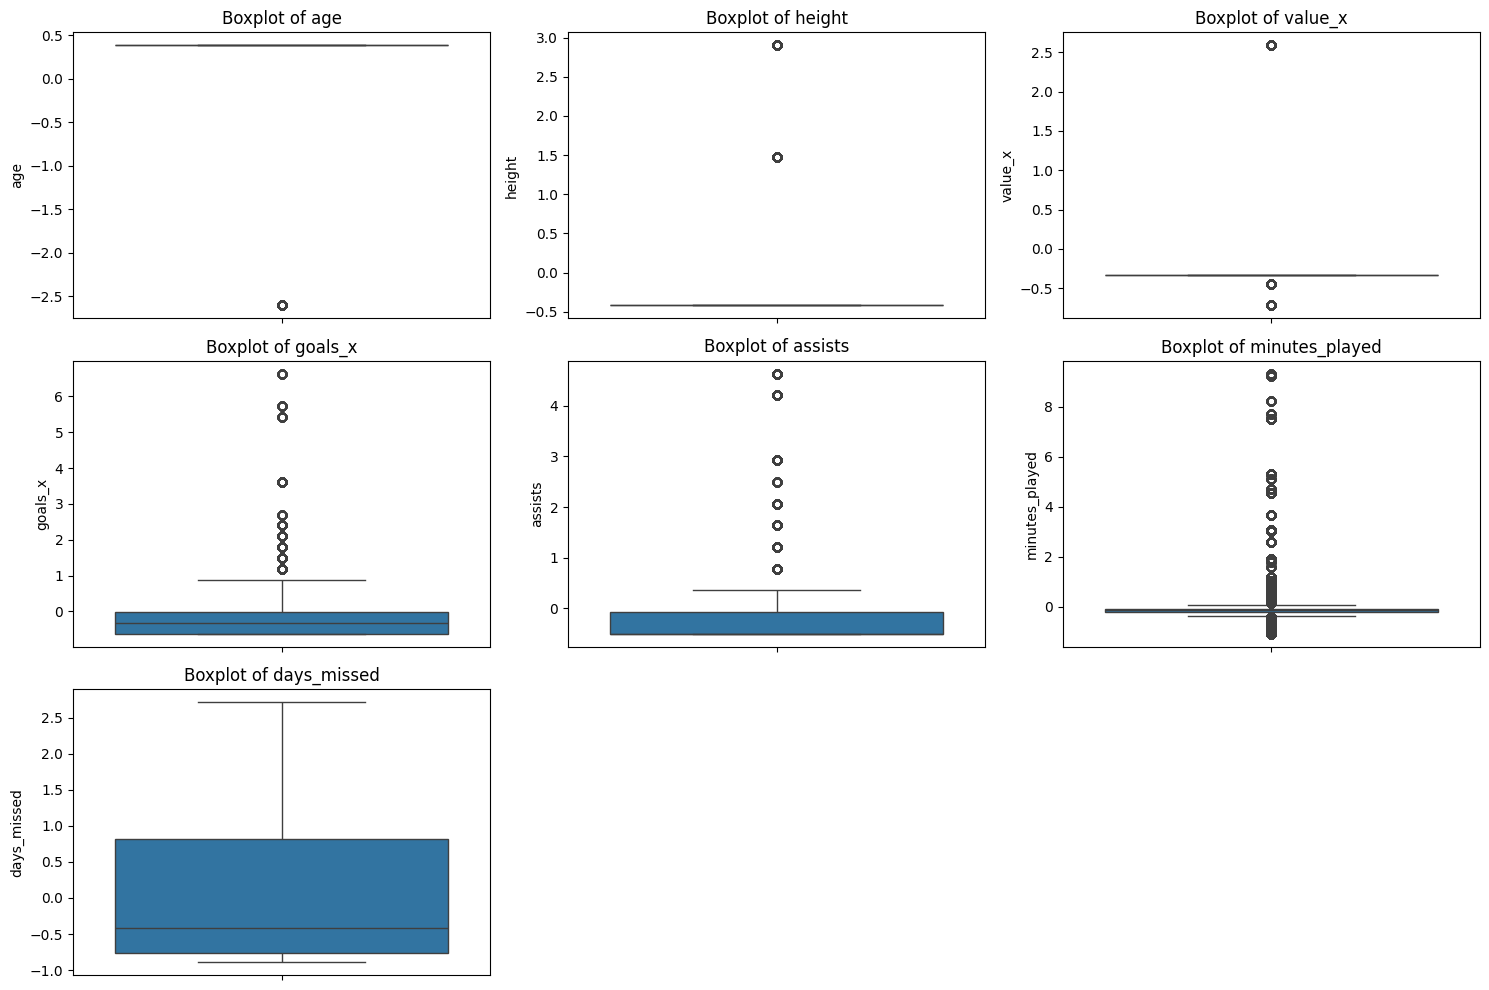

In [12]:
# Create boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

In [13]:
# Calculate Q1, Q3, and IQR(Interquartile Range)
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

In [14]:
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [15]:
# Detect outliers
# A row is an outlier if any of its values in numerical_cols are outside the bounds
outliers_mask = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)

In [16]:
# Count outliers
num_outliers = outliers_mask.sum()
print(f"Number of outlier rows detected: {num_outliers}")

Number of outlier rows detected: 47891


In [17]:
# Remove outliers
df_cleaned = df[~outliers_mask]

In [18]:
df_cleaned.shape

(27840, 31)

In [19]:
df_cleaned.head()

,age,height,value_x,goals_x,assists,minutes_played,days_missed,position_Attack - Centre-Forward,position_Goalkeeper,position_Midfield - Defensive Midfield,...,injury_reason_Fever,injury_reason_Groin injury,injury_reason_Hamstring injury,injury_reason_Knee injury,injury_reason_Knock,injury_reason_Muscle fatigue,injury_reason_Muscle injury,injury_reason_Muscle strain,injury_reason_Thigh problems,injury_reason_unknown injury
15776,0.38391,-0.420751,-0.335354,-0.623032,-0.504084,-0.140743,2.717303,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15777,0.38391,-0.420751,-0.335354,-0.623032,-0.504084,-0.140743,0.840893,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15778,0.38391,-0.420751,-0.335354,-0.623032,-0.504084,-0.140743,-0.472594,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15779,0.38391,-0.420751,-0.335354,-0.623032,-0.504084,-0.140743,-0.764480,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15780,0.38391,-0.420751,-0.335354,-0.623032,-0.504084,-0.140743,-0.410047,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Save the cleaned dataframe
output_filename = 'cleaned_dataset_no_outliers.csv'
df_cleaned.to_csv(output_filename, index=False)

### Extract the X part& Y part

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the dataset
file_path = 'cleaned_dataset_no_outliers.csv'
df = pd.read_csv(file_path)

In [2]:
df.head()

,age,height,value_x,goals_x,assists,minutes_played,days_missed,position_Attack - Centre-Forward,position_Goalkeeper,position_Midfield - Defensive Midfield,...,injury_reason_Fever,injury_reason_Groin injury,injury_reason_Hamstring injury,injury_reason_Knee injury,injury_reason_Knock,injury_reason_Muscle fatigue,injury_reason_Muscle injury,injury_reason_Muscle strain,injury_reason_Thigh problems,injury_reason_unknown injury
0,0.38391,-0.420751,-0.335354,-0.623032,-0.504084,-0.140743,2.717303,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.38391,-0.420751,-0.335354,-0.623032,-0.504084,-0.140743,0.840893,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.38391,-0.420751,-0.335354,-0.623032,-0.504084,-0.140743,-0.472594,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.38391,-0.420751,-0.335354,-0.623032,-0.504084,-0.140743,-0.764480,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.38391,-0.420751,-0.335354,-0.623032,-0.504084,-0.140743,-0.410047,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
# 2. Split into features (X) and target (y)
# Assuming 'value_x' is the target variable based on previous analysis
X = df.drop(columns=['value_x'])
y = df['value_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_train.shape

(22272, 30)

In [5]:
X_test.shape

(5568, 30)

In [6]:
# 3. Polynomial Featurization and Feature Creation loop
poly_results = []
k_values = [1, 2, 3] # You can adjust these values of k

print("--- Step 1: Polynomial Linear Regression ---")
for k in k_values:
    X_train_k = X_train.copy()
    X_test_k = X_test.copy()
    
    # Create a new feature for every value of k (example: age weighted by k)
    X_train_k['k_feature'] = X_train_k['age'] * k
    X_test_k['k_feature'] = X_test_k['age'] * k
    
    # Polynomial expansion (using a subset of numerical columns to prevent memory errors)
    num_cols = ['age', 'height', 'goals_x', 'assists', 'minutes_played', 'k_feature']
    poly = PolynomialFeatures(degree=k)
    X_train_poly = poly.fit_transform(X_train_k[num_cols])
    X_test_poly = poly.transform(X_test_k[num_cols])
    
    # Train Linear Regression
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)
    y_pred = lr.predict(X_test_poly)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    poly_results.append({'k': k, 'MSE': mse, 'R2': r2})
    print(f"k={k}: MSE={mse:.4f}, R2={r2:.4f}")

--- Step 1: Polynomial Linear Regression ---
k=1: MSE=0.0000, R2=0.0000
k=2: MSE=0.0000, R2=0.0000
k=3: MSE=0.0000, R2=0.0000


In [7]:
# Convert results to DataFrame
poly_df = pd.DataFrame(poly_results)

# 4. Logic: If Linear Regression fails, go to Decision Tree, then Random Forest
# Failure threshold: R2 < 0.7 (You can adjust this threshold)
best_r2 = poly_df['R2'].max()

if best_r2 < 0.7:
    print("\n--- Step 2: Linear Regression failed. Trying Decision Tree ---")
    dt = DecisionTreeRegressor(random_state=42)
    dt.fit(X_train, y_train)
    dt_pred = dt.predict(X_test)
    dt_r2 = r2_score(y_test, dt_pred)
    print(f"Decision Tree R2: {dt_r2:.4f}")
    
    if dt_r2 < 0.7:
        print("\n--- Step 3: Decision Tree failed. Trying Random Forest ---")
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        rf_pred = rf.predict(X_test)
        rf_r2 = r2_score(y_test, rf_pred)
        print(f"Random Forest R2: {rf_r2:.4f}")
        
        # 5. Feature Importance and Reduction
        importances = rf.feature_importances_
        feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
        feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
        
        print("\nTop 5 Features by Importance:")
        print(feat_imp.head(5))
        
        # Reduced model
        top_features = feat_imp['Feature'].head(10).tolist()
        rf_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_reduced.fit(X_train[top_features], y_train)
        print(f"Reduced Model (Top 10 features) R2: {rf_reduced.score(X_test[top_features], y_test):.4f}")
else:
    print("\nLinear Regression performed well. No further models required.")


--- Step 2: Linear Regression failed. Trying Decision Tree ---
Decision Tree R2: -241593.0821

--- Step 3: Decision Tree failed. Trying Random Forest ---
Random Forest R2: -17761.3764

Top 5 Features by Importance:
                     Feature  Importance
4             minutes_played    0.287230
3                    assists    0.207563
5                days_missed    0.171369
2                    goals_x    0.124179
15  injury_reason_Broken leg    0.033345
Reduced Model (Top 10 features) R2: -15430.1415


In [8]:
# Save results
poly_df.to_csv('k_value_metrics.csv', index=False)

In [9]:
# If you have xgboost installed in your local environment:
try:
    from xgboost import XGBRegressor
    xgb_available = True
except ImportError:
    xgb_available = False
    print("XGBoost library not found. Please install it using 'pip install xgboost' to run the XGBoost part.")


In [10]:

# Dictionary to store results
model_metrics = []

# --- 2. Decision Tree Regressor ---
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)
model_metrics.append({'Model': 'Decision Tree', 'MSE': dt_mse, 'R2 (Accuracy)': dt_r2})

In [11]:
model_metrics

[{'Model': 'Decision Tree',
  'MSE': 7.444692432915261e-28,
  'R2 (Accuracy)': -241593.08207614944}]

In [12]:

# --- 3. Random Forest Regressor ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
model_metrics.append({'Model': 'Random Forest', 'MSE': rf_mse, 'R2 (Accuracy)': rf_r2})

In [13]:
model_metrics

[{'Model': 'Decision Tree',
  'MSE': 7.444692432915261e-28,
  'R2 (Accuracy)': -241593.08207614944},
 {'Model': 'Random Forest',
  'MSE': 5.473454826092152e-29,
  'R2 (Accuracy)': -17761.376436781607}]

In [14]:
# --- 4. XGBoost Regressor ---
if xgb_available:
    xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    xgb_mse = mean_squared_error(y_test, y_pred_xgb)
    xgb_r2 = r2_score(y_test, y_pred_xgb)
    model_metrics.append({'Model': 'XGBoost', 'MSE': xgb_mse, 'R2 (Accuracy)': xgb_r2})

In [15]:
model_metrics

[{'Model': 'Decision Tree',
  'MSE': 7.444692432915261e-28,
  'R2 (Accuracy)': -241593.08207614944},
 {'Model': 'Random Forest',
  'MSE': 5.473454826092152e-29,
  'R2 (Accuracy)': -17761.376436781607},
 {'Model': 'XGBoost',
  'MSE': 8.790131154090729e-17,
  'R2 (Accuracy)': -2.852560648593401e+16}]

In [16]:
# Display Initial Results
results_df = pd.DataFrame(model_metrics)
print("\n--- Model Comparison ---")
print(results_df)


--- Model Comparison ---
           Model           MSE  R2 (Accuracy)
0  Decision Tree  7.444692e-28  -2.415931e+05
1  Random Forest  5.473455e-29  -1.776138e+04
2        XGBoost  8.790131e-17  -2.852561e+16


In [17]:
# --- 5. Feature Importance and Reduction (using Random Forest) ---
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\n--- Top 10 Features (RF Importance) ---")
print(importance_df.head(10))


--- Top 10 Features (RF Importance) ---
                        Feature  Importance
4                minutes_played    0.287230
3                       assists    0.207563
5                   days_missed    0.171369
2                       goals_x    0.124179
15     injury_reason_Broken leg    0.033345
18  injury_reason_Calf problems    0.031815
23    injury_reason_Knee injury    0.029949
24          injury_reason_Knock    0.027314
26  injury_reason_Muscle injury    0.023262
16   injury_reason_Bruised ribs    0.020325


In [18]:
# Reducing features to top 10 for Random Forest
top_features = importance_df['Feature'].head(10).tolist()
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

rf_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reduced.fit(X_train_reduced, y_train)
reduced_r2 = rf_reduced.score(X_test_reduced, y_test)

print(f"\nRandom Forest R2 with Reduced Features (Top 10): {reduced_r2:.4f}")


Random Forest R2 with Reduced Features (Top 10): -15430.1415


In [19]:
X_test_reduced.shape

(5568, 10)

In [20]:
X_train_reduced.shape

(22272, 10)

In [21]:
top_features

['minutes_played',
 'assists',
 'days_missed',
 'goals_x',
 'injury_reason_Broken leg',
 'injury_reason_Calf problems',
 'injury_reason_Knee injury',
 'injury_reason_Knock',
 'injury_reason_Muscle injury',
 'injury_reason_Bruised ribs']

In [22]:
reduced_r2

-15430.141522988506

In [23]:
import joblib

# 1. Train your best model (e.g., Random Forest)
rf_final = RandomForestRegressor(n_estimators=100, random_state=42)
rf_final.fit(X_train, y_train)

# 2. Save the model to a file
joblib.dump(rf_final, 'best_model.pkl')

# 3. Save the feature names so the API knows the input order
joblib.dump(list(X.columns), 'model_features.pkl')

print("Model and features saved successfully!")

Model and features saved successfully!


In [24]:
pip install fastapi uvicorn joblib pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
